# ADVERTISING-SALES MODEL 

Description:
The advertising dataset captures the sales revenue generated with respect to advertisement costs across multiple channels like radio, tv, and newspapers.

We would want to consider the impacts of the various advertising on Sales revenue to be generated.

In a business sense you would want to 


# Exploratory Data Analysis

In [22]:
#importing the necessary libraries
import seaborn as sn
import scipy as sp
import statsmodels.api as sm
import pandas as pd
import matplotlib.pyplot as plt
#importing the machine learning models
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn import preprocessing


In [23]:
#redading the dataset from Kaggle
data= pd.read_csv('Advertising.csv')
data

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [24]:
#dropping columns not needed
data.drop('Unnamed: 0',axis=1,inplace=True)
data.columns = ['TV', 'Radio', 'Newspaper', 'Sales']
data

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [1]:
#The pairs plot builds on two basic figures, the histogram and the scatter plot. The histogram on the diagonal allows us to see the distribution of a single variable while the scatter plots on the upper and lower triangles show the relationship (or lack thereof) between two variables.

In [25]:
data.T.head(3)

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
TV,230.1,44.5,17.2,151.5,180.8,8.7,57.5,120.2,8.6,199.8,...,39.5,75.5,17.2,166.8,149.7,38.2,94.2,177.0,283.6,232.1
Radio,37.8,39.3,45.9,41.3,10.8,48.9,32.8,19.6,2.1,2.6,...,41.1,10.8,4.1,42.0,35.6,3.7,4.9,9.3,42.0,8.6
Newspaper,69.2,45.1,69.3,58.5,58.4,75.0,23.5,11.6,1.0,21.2,...,5.8,6.0,31.6,3.6,6.0,13.8,8.1,6.4,66.2,8.7


In [26]:
data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


<AxesSubplot:>

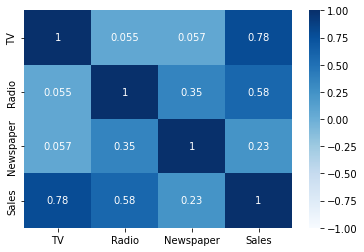

In [27]:
sn.heatmap(data.corr(),vmin=-1,vmax=1,cmap='Blues',annot=True)

In [28]:
#checking the number of unique rows in each feature
data.nunique().sort_values()

Sales        121
Radio        167
Newspaper    172
TV           190
dtype: int64

In [29]:
#checking for empty values in rows
data.isna().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [30]:
#running correlation between the feature variables 
cor_tion = data[['Radio', 'Newspaper']].corr()
cor_tion

,Radio,Newspaper
Radio,1.000000,0.354104
Newspaper,0.354104,1.000000


In [31]:
#running correlation btn radio ads & TV ads costs
cor = data[['Radio', 'TV']].corr()
cor

,Radio,TV
Radio,1.000000,0.054809
TV,0.054809,1.000000


In [32]:
#running correlation btn TV ads & Newspaper ads costs
correlation = data[['TV', 'Newspaper']].corr()
correlation

,TV,Newspaper
TV,1.000000,0.056648
Newspaper,0.056648,1.000000


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


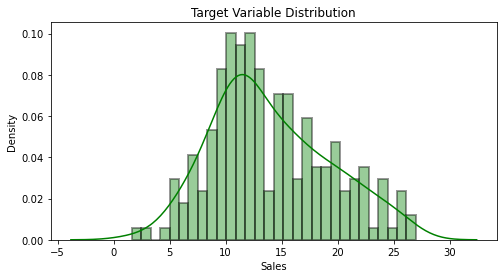

In [33]:
#Let us first analyze the distribution of the target variable

plt.figure(figsize=[8,4])
sn.distplot(data['Sales'], color='g',hist_kws=dict(edgecolor="black", linewidth=2), bins=30)
plt.title('Target Variable Distribution')
plt.show()



# CREATING THE MODEL

In [42]:
#determing the variable names for the simple linear regression model
# y = mx + c
y=data['Sales']
x=data[['TV','Newspaper','Radio']]

#we are adding the contant
X=sm.add_constant(x)


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [43]:
#DATA SELECTION
#splitting the data into Testing and Trainning
x_train,x_test,y_train,y_test= train_test_split(x,y,train_size= 0.55,test_size= 0.45,random_state= 0)

In [39]:
#computing the OLS regresion output
Sales=sm.OLS(y,x)
Sales=Sales.fit()
Sales.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Sales   R-squared (uncentered):                   0.982
Model:                            OLS   Adj. R-squared (uncentered):              0.982
Method:                 Least Squares   F-statistic:                              3566.
Date:                Fri, 21 Jul 2023   Prob (F-statistic):                   2.43e-171
Time:                        19:56:44   Log-Likelihood:                         -423.54
No. Observations:                 200   AIC:                                      853.1
Df Residuals:                     197   BIC:                                      863.0
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
TV             0.0538      0.001     40.507      0.000       0.051       0.056
Newspaper      0.0168      0.007      2.517      0.013       0.004       0.030
Radio          0.2222      0.009     23.595      0.000       0.204       0.241
==============================================================================
Omnibus:                        5.982   Durbin-Watson:                   2.038
Prob(Omnibus):                  0.050   Jarque-Bera (JB):                7.039
Skew:                          -0.232   Prob(JB):                       0.0296
Kurtosis:                       3.794   Cond. No.                         12.6
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [40]:
#calculating the parameter values for the training 
Sales.params

TV           0.053792
Newspaper    0.016816
Radio        0.222227
dtype: float64

In [ ]:
#plottingthe confusion matrix
#y_pred = knn.predict(X_test)
#from sklearn import metrics
#cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
#p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
#plt.title('Confusion matrix', y=1.1)
#plt.ylabel('Actual label')
#plt.xlabel('Predicted label')